# <ins> Análisis de datos de accidentes viales </ins>
## 1- Importando el dataset
### _Se importa el dataset con Pandas y se definen los nombres de las columnas, para poder referenciarlas posteriormente._

In [7]:
%matplotlib inline
from sklearn.svm import LinearSVC
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

pd.set_option('display.max_columns', None)

data_frame = pd.read_csv("Accidente.csv")
headers = ["ID","Source","TMC","Severity","Start_Time","End_Time","Start_Lat","Start_Lng","End_Lat","End_Lng","Distance(mi)","Description",
"Number","Street","Side","City","County","State","Zipcode","Country","Timezone","Airport_Code","Weather_Timestamp","Temperature(F)",
"Wind_Chill(F)","Humidity(%)","Pressure(in)","Visibility(mi)","Wind_Direction","Wind_Speed(mph)","Precipitation(in)","Weather_Condition",
"Amenity","Bump","Crossing","Give_Way","Junction","No_Exit","Railway","Roundabout","Station","Stop","Traffic_Calming","Traffic_Signal",
"Turning_Loop","Sunrise_Sunset","Civil_Twilight","Nautical_Twilight","Astronomical_Twilight"]
data_frame.columns = headers

## 2- Data Processing.
### _Se aplica One-Hot-Encoding para tratar los datos categóricos de forma adecuada para los modelos._

In [8]:
#Columna "Junction"
data_frame_dummies_junction = pd.get_dummies(data_frame['Junction'])
data_frame_dummies_junction = data_frame_dummies_junction.rename(columns=lambda s: "Junction_ {}".format(s))
data_frame = data_frame.drop(['Junction'], axis = 1)
data_frame = data_frame.join(data_frame_dummies_junction)

#Columna "Stop"
data_frame_dummies_stop = pd.get_dummies(data_frame['Stop'])
data_frame_dummies_stop = data_frame_dummies_stop.rename(columns=lambda s: "Stop_{}".format(s))
data_frame = data_frame.drop(['Stop'], axis = 1)
data_frame = data_frame.join(data_frame_dummies_stop)

#Columna "Traffic_Signal"
data_frame_dummies_traffic_signal = pd.get_dummies(data_frame['Traffic_Signal'])
data_frame_dummies_traffic_signal = data_frame_dummies_traffic_signal.rename(columns=lambda s: "Traffic_Signal_{}".format(s))
data_frame = data_frame.drop(['Traffic_Signal'], axis = 1)
data_frame = data_frame.join(data_frame_dummies_traffic_signal)

#Columna "Sunrise_Sunset"
data_frame_dummies_sunrise_sunset = pd.get_dummies(data_frame['Sunrise_Sunset'])
data_frame_dummies_sunrise_sunset = data_frame_dummies_sunrise_sunset.rename(columns=lambda s: "Sunrise_Sunset_" + s)
data_frame = data_frame.drop(['Sunrise_Sunset'], axis = 1)
data_frame = data_frame.join(data_frame_dummies_sunrise_sunset)


data_frame.head(5)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,No_Exit,Railway,Roundabout,Station,Traffic_Calming,Turning_Loop,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Junction_ False,Junction_ True,Stop_False,Stop_True,Traffic_Signal_False,Traffic_Signal_True,Sunrise_Sunset_Day,Sunrise_Sunset_Night
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,1,0,1,0,1,0,0,1
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,1,0,1,0,1,0,0,1
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,1,0,1,0,0,1,0,1
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,1,0,1,0,1,0,0,1
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,1,0,1,0,0,1,1,0


ValueError: Expected 2D array, got 1D array instead:
array=[3. 2. 2. ... 2. 2. 2.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

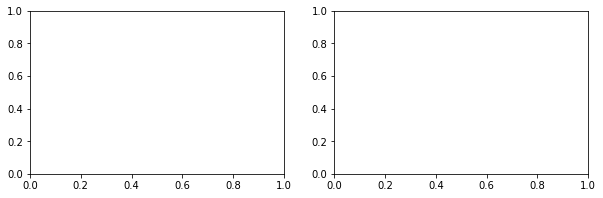

In [10]:
data_frame_prueba = data_frame["Severity","Sunrise_Sunset_Day"]
x = data_frame.Severity
y = data_frame.Sunrise_Sunset_Day

print("Severity = {}".format(x))
print("Sunset = {}".format(y))

#model = LinearSVC()
#model.fit(x,y)

#plt.plot(x, y, 'o')
